In [24]:
import numpy as np
import pandas as pd
from scipy.stats import binom
from scipy.stats import uniform
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az

from mpl_toolkits.mplot3d import Axes3D

## Coin

In [5]:
num_heads = np.arange(0, 101, 1)
head_prob = np.arange(0, 1.01, 0.01)


In [8]:
coin = pd.DataFrame([(x, y) for x in num_heads for y in head_prob])
coin.columns = ["num_heads", "head_prob"]
coin

,num_heads,head_prob
0,0,0.00
1,0,0.01
2,0,0.02
3,0,0.03
4,0,0.04
...,...,...
10196,100,0.96
10197,100,0.97
10198,100,0.98
10199,100,0.99


In [11]:
y=binom.pmf(num_heads, 100, 0.5)
np.sum(y)


0.9999999999999999

In [9]:
coin["prior"] = uniform.pdf(coin["head_prob"])
coin["likelihood"] = binom.pmf(coin["num_heads"], 100, coin["head_prob"])
coin

,num_heads,head_prob,prior,likelihood
0,0,0.00,1.0,1.000000
1,0,0.01,1.0,0.366032
2,0,0.02,1.0,0.132620
3,0,0.03,1.0,0.047553
4,0,0.04,1.0,0.016870
...,...,...,...,...
10196,100,0.96,1.0,0.016870
10197,100,0.97,1.0,0.047553
10198,100,0.98,1.0,0.132620
10199,100,0.99,1.0,0.366032


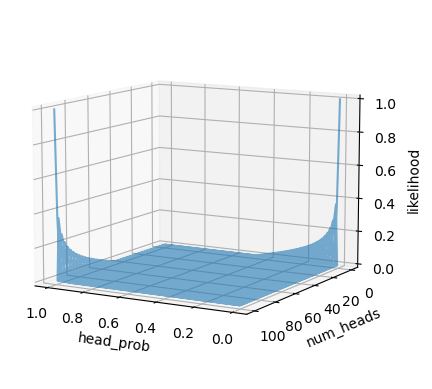

In [42]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#scatter = ax.scatter(coin['head_prob'], coin['num_heads'], coin['likelihood'],marker='o', alpha=0.3)
line= ax.plot(coin['head_prob'], coin['num_heads'], coin['likelihood'], alpha=0.6)

ax.set_xlabel('head_prob')
ax.set_ylabel('num_heads')
ax.set_zlabel('likelihood')
ax.view_init(elev=10, azim=120)
plt.show()

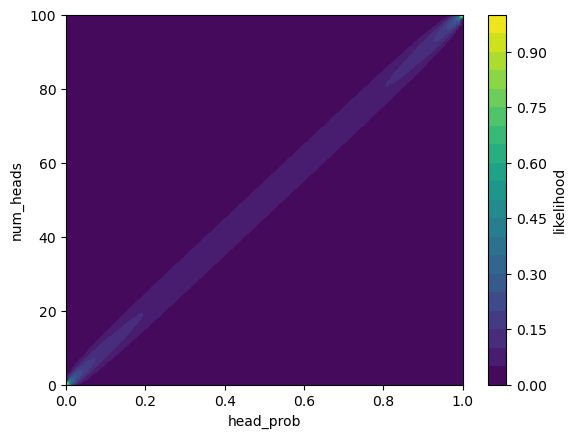

In [52]:
fig2d, ax2d = plt.subplots()
contour = ax2d.tricontourf(coin['head_prob'], coin['num_heads'], coin['likelihood'], levels=20, cmap='viridis')
ax2d.set_xlabel('head_prob')
ax2d.set_ylabel('num_heads')

cbar = plt.colorbar(contour)
cbar.set_label('likelihood')

plt.show()



In [57]:
coin["posterior_prob"] = coin["prior"] * coin["likelihood"]
coin["posterior_prob"] /= coin["posterior_prob"].sum()

In [67]:
heads75 = coin.loc[coin["num_heads"] == 75]
heads75["posterior_prob"] /= heads75["posterior_prob"].sum()
heads75

C:\Windows\Temp\ipykernel_5916\3464458203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heads75["posterior_prob"] /= heads75["posterior_prob"].sum()


,num_heads,head_prob,prior,likelihood,posterior_prob
7575,75,0.00,1.0,0.000000e+00,0.000000e+00
7576,75,0.01,1.0,1.886367e-127,1.905230e-127
7577,75,0.02,1.0,5.529016e-105,5.584306e-105
7578,75,0.03,1.0,6.888644e-92,6.957530e-92
7579,75,0.04,1.0,1.247459e-82,1.259934e-82
...,...,...,...,...,...
7671,75,0.96,1.0,1.278170e-13,1.290951e-13
7672,75,0.97,1.0,2.092463e-16,2.113387e-16
7673,75,0.98,1.0,1.788347e-20,1.806231e-20
7674,75,0.99,1.0,1.141263e-27,1.152676e-27


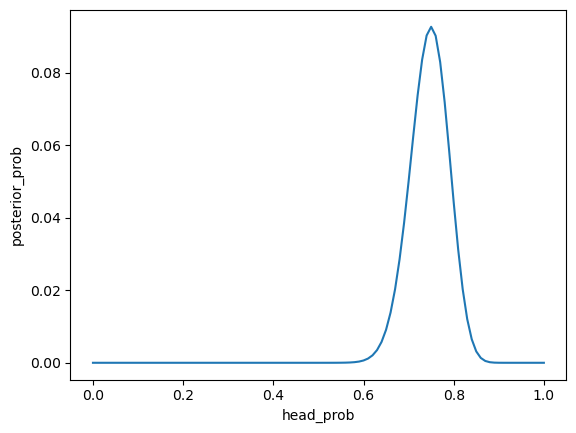

In [68]:
sns.lineplot(data=heads75, x="head_prob", y="posterior_prob")
plt.show()